<a href="https://colab.research.google.com/github/C0SS10/AI4ENG-II/blob/main/House-Price-Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📦 Módulos, archivos, paquetes importantes para la ejecución del notebook.**

In [1]:
# Montando el drive local
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**❗Si no quieres/no tienes cuenta de Kaggle para utilizar la API puedes omitir esta parte y subir el archivo del dataset abriendo la barra lateral izquierda de este notebook colab.**

In [2]:
!pip install kaggle
!mkdir ~/.kaggle

# Aquí debes cambiar la ruta '/content/drive/MyDrive/Modelos_II/kaggle.json'
# Por la ruta donde tengas las credenciales de kaggle
! cp /content/drive/MyDrive/Modelos_II/kaggle.json ~/.kaggle/kaggle.json

❗Estamos utilizando la API de kaggle; Si tienes cuenta de Kaggle puede descargar las credenciales yendo al apartado de 'account' en tu perfil de kaggle ó también, "**https://www.kaggle.com/username/account**" cambiando 'username' por tu nombre de usuario de Kaggle.

🔼 Luego das click en el botón de 'Create API Token' se te descargará un archivo .json, el cual deberás subir a tu unidad de **Drive**. Luego cambias la ruta especificada en el código.

In [3]:
! kaggle datasets download -d jacksondivakarr/house-price-prediction-dataset
! unzip house-price-prediction-dataset.zip

  0% 0.00/260k [00:00<?, ?B/s]
100% 260k/260k [00:00<00:00, 72.1MB/s]
Archive:  house-price-prediction-dataset.zip
  inflating: csvdata.csv             


In [4]:
# Librerias uso básico
import numpy as np
import pandas as pd

# Librerias para gráficar
import seaborn as sns
import matplotlib.pyplot as plt

## **🧰 Prepocesamiento de datos**

In [5]:
house_data = pd.read_csv('./csvdata.csv', sep=',').drop(['Unnamed: 0'], axis=1)
house_data.head()

,City,Price,Area,Location,No. of Bedrooms
0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,Bangalore,8358000,1675,Doddanekundi,3
4,Bangalore,6845000,1670,Kengeri,3


🤓 Leemos el archivo .csv y a su vez eliminamos la columna llamada 'Unnamed: 0' porque creemos que nos da información que no es importante/utilizable.

- 🏙️ La categoria 'City' proporciona información sobre los lugares de la india donde se ofertaron las casas.
- 💰 'Price' nos dice cuánto vale la casa en cuestión, el valor consideramos que está en Rupias (el dataset no ofrece información sobre la columna).
- 🏙 Luego está 'Area' el cual es un identificador único de la zona donde se encuentra la casa en venta.
- 📮 'Location' nos da el nombre de la zona/barrio/municipio/dirección.
- 🛌 Por último está el número de dormitorios que tiene la casa.

In [6]:
# Revisando si el dataset tiene valores nulos
house_data_nan = house_data.isnull().sum() * 100
house_data_nan

City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

❌ Vemos que el dataset no cuenta con datos nulos en ninguna de su columna. El resultado está en unidades de porcentaje.

In [7]:
# Resumen estadistico del dataset
house_data.describe()

,Price,Area,No. of Bedrooms
count,2.913500e+04,29135.000000,29135.000000
mean,1.195267e+07,1301.816475,2.421074
std,2.387647e+07,767.862339,0.821016
min,2.000000e+06,200.000000,1.000000
25%,4.179999e+06,870.000000,2.000000
50%,6.884999e+06,1137.000000,2.000000
75%,1.230000e+07,1504.000000,3.000000
max,8.546000e+08,16000.000000,9.000000


- 💰La media de los precios es: 11952670₹ Rupias
- 💰La casa más cara tiene un valor de 854600000₹ Rupias
- ❌No hay información útil que se pueda sacar de 'Area'
- 🛌La media de habitaciones se encuentra en 2 habitaciones aproximadamente.

In [8]:
# Resumen estadistico para variables categóricas
house_data.describe(include=['object'])

,City,Location
count,29135,29135
unique,6,1776
top,Mumbai,New Town
freq,6925,687


- 🖋️ En el dataset tenemos 29135 observaciones
- 📍 6 ciudades únicas y 1776 zonas/barrios
- 📍 La ciudad que más se repite es Mumbai con 6925 observaciones
- 🖋️ El barrio/zona de New Town tiene 687 observaciones asociadas.

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29135 entries, 0 to 29134
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             29135 non-null  object
 1   Price            29135 non-null  int64 
 2   Area             29135 non-null  int64 
 3   Location         29135 non-null  object
 4   No. of Bedrooms  29135 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


📄 Información adicional del objeto 'DataFrame'

## **Exploración de datos 👀**

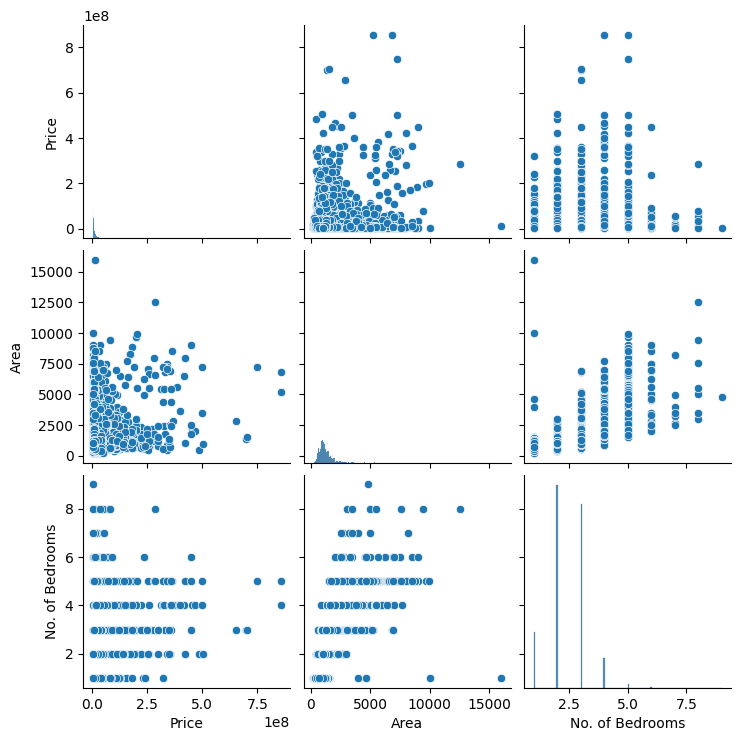

In [18]:
sns.pairplot(house_data, diag_kind="hist")

- En la diagonal principal se muestra la distribucion de cada variable continua, se puede apreciar una cola a la izquierda en cada una.

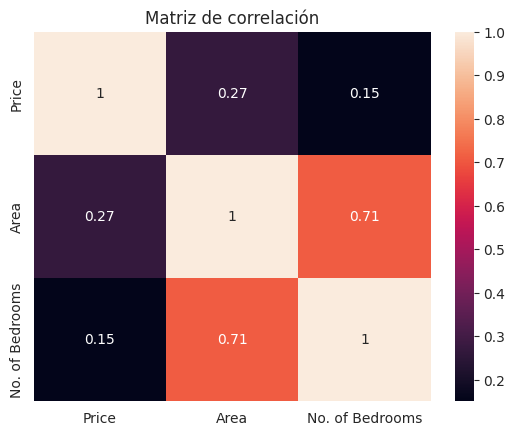

<Figure size 800x800 with 0 Axes>

In [ ]:
matriz_correlacion = house_data.corr(numeric_only=True)
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de correlación")
plt.figure(figsize=(8, 8))
plt.show()

- 📊 Hay una correlación positiva moderada entre 'Price' y 'Area'. El precio puede cambiar si se cambia el 'Area'
- 📊 Correlación débil entre 'Price' y 'No. Of Bedrooms'. La cantidad de habitaciones no cambia tanto el precio de la casa.
- 📊 Se tiene una correlación fuerte entre 'Area' y 'No. Of Bedrooms'. Si se cambia el area de la casa es probable que el número de habitaciones aumente.

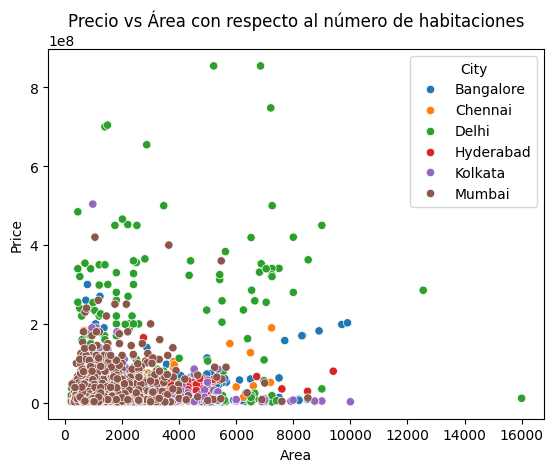

In [21]:
sns.scatterplot(x='Area', y='Price', data=house_data, hue='City')
plt.title('Precio vs Área con respecto al número de habitaciones')
plt.show()

- 🏠 Las casas en Delhi son las más caras.
- 🏠 Mumbai y Kolkata tienen las casas más baratas.
- 🏠 La mayoría de casas se encuentra en el Area de 0 a 6000

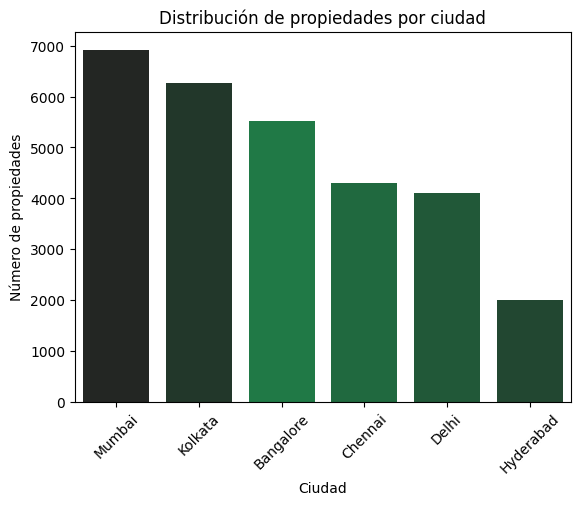

In [22]:
sns.countplot(x='City', data=house_data, order=house_data['City'].value_counts().index, hue='City', palette='dark:#184_r')
plt.title('Distribución de propiedades por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de propiedades')
plt.xticks(rotation=45)
plt.show()

- 🏠 Hay aproximadamente 4000 ofertas de casas en Delhi
- 🏠 Hyderabad tiene la menor oferta, aunque no afecta al precio.